# Remove Water

This notebook demonstrates how we can clip the water from geographies
when we download data. The purpose of this is to produce better looking
maps, particularly when zoomed in to the census tract or narrower level.

In [1]:
# So we can run from within the censusdis project and find the packages we need.
import os
import sys

sys.path.append(
    os.path.join(os.path.abspath(os.path.join(os.path.curdir, os.path.pardir)))
)
import os

In [2]:
import censusdis.data as ced
import censusdis.maps as cem
from censusdis.states import NY

In [3]:
YEAR = 2020
DATASET = "acs/acs5"
VARIABLE = "B19013_001E"

The default census geopgraphies often contain areas of water. This can make maps confusing in areas along bodies of water. For example, in this map there are various census tracts in Manhattan that extend out into the middle of the Hudson River, up to the New Jersey border. There are also census tracts that extend out into the East River from both sides, 
making it looks like Manhattan is connected to Brooklyn, Queens, and the Bronx.

In [4]:
gdf_tract = ced.download(
    DATASET,
    YEAR,
    VARIABLE,
    state=NY,
    county=["061", "081", "005", "047"],
    tract="*",
    with_geometry=True,
)

<Axes: >

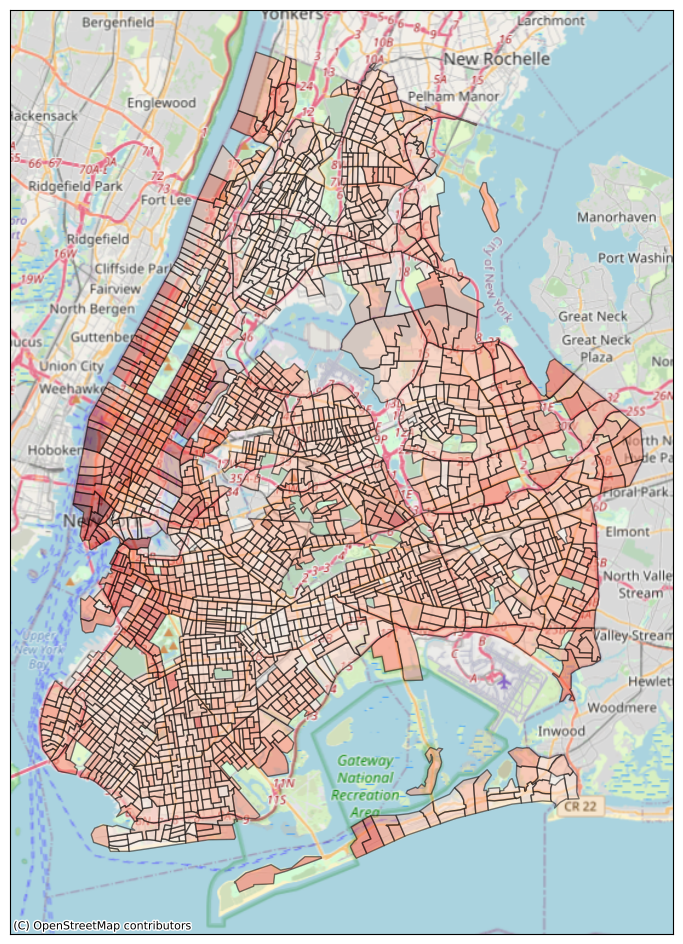

In [5]:
cem.plot_map(
    gdf_tract,
    VARIABLE,
    with_background=True,
    edgecolor="black",
    alpha=0.5,
    cmap="Reds",
    figsize=(12, 12),
)

The `remove_water` flag will query the TIGER API for the AREAWATER shapefiles and remove the water areas from the census geographies. Now the tracts we plot fit the 
actual map much better, and we can see the rivers. We can even see Roosevelt Island clearly, whereas it was completely lost before.

In [6]:
gdf_tract_no_water = ced.download(
    "acs/acs5",
    2021,
    "B19013_001E",
    with_geometry=True,
    remove_water=True,
    state=NY,
    county=["061", "081", "005", "047"],
    tract="*",
)

<Axes: >

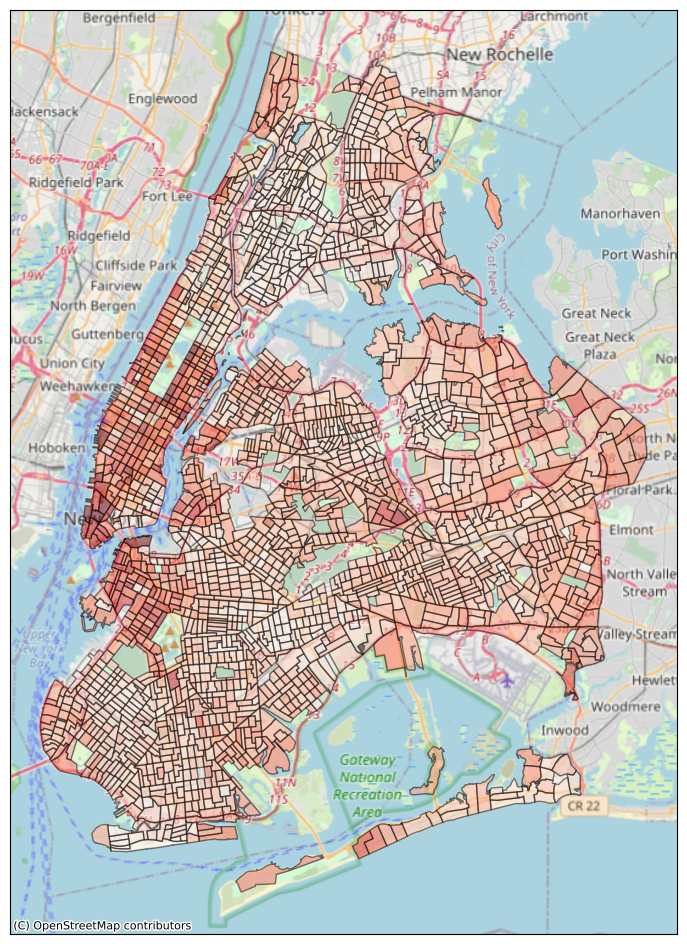

In [7]:
cem.plot_map(
    gdf_tract_no_water,
    VARIABLE,
    with_background=True,
    edgecolor="black",
    alpha=0.5,
    cmap="Reds",
    figsize=(12, 12),
)